In [ ]:
2+2

: 

In [ ]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import os, random
# Load the image
base_dir = '/data/valerii/gan_adversarial/data/test_set/test_set/cats/'
filenames = os.listdir(base_dir)
transform = transforms.ToTensor()

# image_path = random.choice(filenames)
width, height = [], []

for filename in filenames:
    if filename[-3:] == 'jpg':
        image = Image.open(base_dir+filename)
        tensor_image = transform(image)
        resolution = tensor_image.shape[1], tensor_image.shape[2]
        width.append(tensor_image.shape[1])
        height.append(tensor_image.shape[2])

: 

In [24]:
print(f'width: {np.mean(width)}, +-{2*np.std(width)}, height: {np.mean(height)} +- {2*np.std(height)}')

width: 356.27299703264094, +-191.69342335392557, height: 412.6656775469832 +- 214.67062617156938


## Classifier

In [4]:
import torch
import torch.nn as nn
import torchvision.models as models


In [15]:
resnet18=models.resnet18(pretrained=True)
num_params = sum(p.numel() for p in resnet18.parameters())
print(f"Number of parameters in the model: {num_params}, with weight of {'{:.2f}'.format(num_params*4/1024/1024)} MB")

Number of parameters in the model: 11689512, with weight of 44.59 MB


In [2]:
from Classifier import ResNet18
model=ResNet18()



/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Dataset Class

In [2]:
d = {"a":1,"b":2}
d.keys()

dict_keys(['a', 'b'])

In [5]:
list(d.keys(
))

['a', 'b']

In [1]:
from MakeDataset import MakeDataset
base_dir='/home/stud_valery/gan_adversarial/data'

dataset = MakeDataset(base_dir, 'test_set')

get dataset from /home/stud_valery/gan_adversarial/data/test_set/cats/...: 100%|██████████| 1012/1012 [00:04<00:00, 231.00it/s]
get dataset from /home/stud_valery/gan_adversarial/data/test_set/dogs/...: 100%|██████████| 1013/1013 [00:04<00:00, 225.21it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


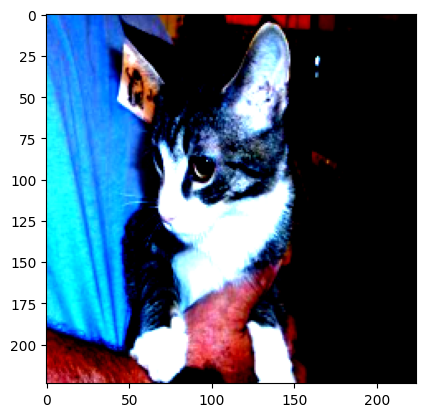

In [8]:
dataset.show_tensor_image(dataset[10][0])

## Generator

In [1]:
from Generator import GeneratorVAE
from MakeDataset import MakeDataset
base_dir='/home/stud_valery/gan_adversarial/data'

gen = GeneratorVAE()
dataset = MakeDataset(base_dir, 'test_set', limit=100)

get dataset from /home/stud_valery/gan_adversarial/data/test_set/cats/...: 100%|██████████| 100/100 [00:00<00:00, 261.21it/s]
get dataset from /home/stud_valery/gan_adversarial/data/test_set/dogs/...: 100%|██████████| 100/100 [00:00<00:00, 250.64it/s]


In [2]:
out = gen(dataset[0][0].unsqueeze(0))

In [3]:
out.shape

torch.Size([1, 3, 224, 224])

In [5]:
import torch
t = torch.tensor([1, 0, 0, 1])
1-t

tensor([0, 1, 1, 0])

In [3]:
import numpy as np
pixel_sums = []
for i in range(len(dataset)):
    pixel_sums.append(dataset[i][0].sum())
print(np.mean(pixel_sums), np.std(pixel_sums))

6779.435 66506.24


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


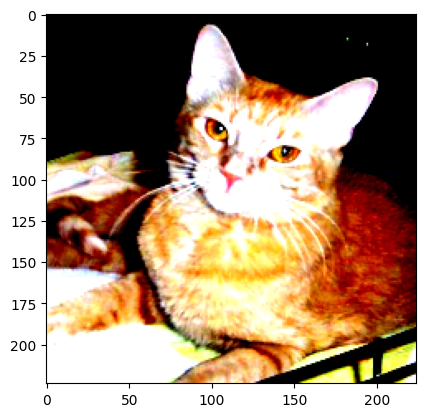

In [17]:
dataset.show_tensor_image(dataset[3][0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


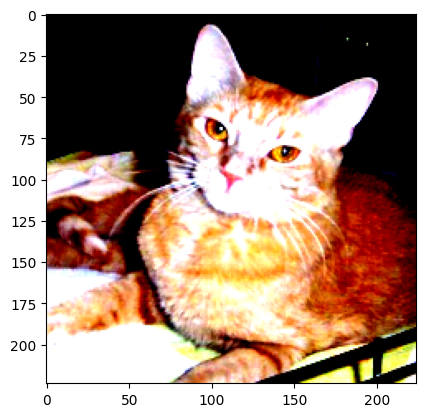

In [21]:
dataset.show_tensor_image(dataset[3][0] + out[0].detach().cpu())

In [10]:
import torch
target_sum = 50
current_sum = torch.sum(out[0])
normalized_image = (out[0] / current_sum) * target_sum

In [1]:
import torch

# Assuming your tensor is named `data`
data = torch.randn(5, 3, 64, 64)  # Example tensor with dimensions (5, 3, 64, 64)

# Sum along dimensions 1, 2, and 3 (all dimensions except dimension 0)
sum_except_dim0 = data.sum(dim=(1, 2, 3))

print("Original tensor shape:", data.shape)
print("Sum along dimensions 1, 2, and 3:", sum_except_dim0)

Original tensor shape: torch.Size([5, 3, 64, 64])
Sum along dimensions 1, 2, and 3: tensor([  98.4716,   48.3927, -106.3560,   59.7929,  -89.0690])


In [12]:
current_sum

tensor(1499.5654, grad_fn=<SumBackward0>)

In [13]:
normalized_image.sum()

tensor(50., grad_fn=<SumBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


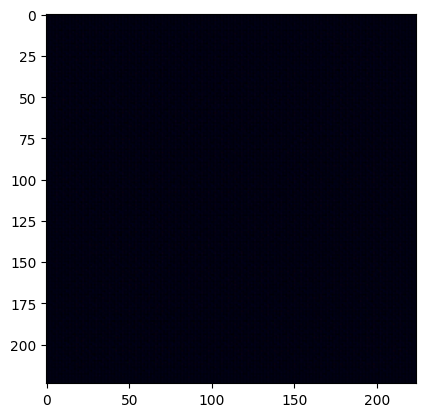

In [9]:
dataset.show_tensor_image(out[0].detach().cpu())

## Evaluate Classifier

In [162]:
from Evaluater import Evaluater
from Classifier import ResNet18
from MakeDataset import MakeDataset
from torch.utils.data import DataLoader
import torch

base_dir='/home/stud_valery/gan_adversarial/data'
dataset = MakeDataset(base_dir, 'test_set')
dataloader = DataLoader(dataset, batch_size=30, shuffle=False)

model = ResNet18()
params = torch.load('/home/stud_valery/gan_adversarial/train_record/no_name/best_model',\
                     map_location='cuda:'+str(0))
model.load_state_dict(params)


evaluater = Evaluater(model, dataloader, 0)
# evaluater.eval()

get dataset from /home/stud_valery/gan_adversarial/data/test_set/cats/...: 100%|██████████| 200/200 [00:01<00:00, 187.70it/s]
get dataset from /home/stud_valery/gan_adversarial/data/test_set/dogs/...: 100%|██████████| 200/200 [00:00<00:00, 222.16it/s]
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [167]:
model.resnet.layer3

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat


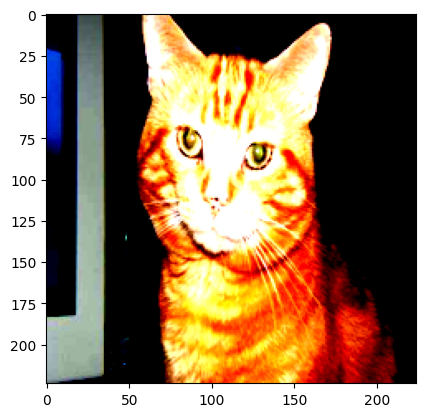

In [15]:
import random

img, target = random.choice(dataset)
predict = model(img.to(0).unsqueeze(0))
print("dog" if predict > 0.5 else "cat")
dataset.show_tensor_image(img)

## Check attacked classifier performance

In [1]:
from Evaluater import Evaluater
from Classifier import ResNet18
from Generator import *
from AttackedClassifier import AttackedClassifier
from MakeDataset import MakeDataset
from torch.utils.data import DataLoader
import torch

device = 1

base_dir='/home/stud_valery/gan_adversarial/data'
dataset = MakeDataset(base_dir, 'training_set', limit=100)
dataloader = DataLoader(dataset, batch_size=30, shuffle=False)

attacker = GeneratorVAE().to(device)
gen_params = torch.load('/home/stud_valery/gan_adversarial/train_record/gan_vae_img/params/last_epoch.pt',\
                     map_location='cuda:'+str(device))
attacker.load_state_dict(gen_params)

classifier = ResNet18().to(device)
# classifier.eval()
params = torch.load('/home/stud_valery/gan_adversarial/train_record/no_normalization/best_model',\
                     map_location='cuda:'+str(device))
classifier.load_state_dict(params)

attacked_classifier = AttackedClassifier(attacker, classifier).to(device)
evaluater = Evaluater(attacked_classifier, dataloader, device)
# evaluater.eval()

/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
get dataset from /home/stud_valery/gan_adversarial/data/training_set/cats/...: 100%|██████████| 100/100 [00:00<00:00, 243.70it/s]
get dataset from /home/stud_valery/gan_adversarial/data/training_set/dogs/...: 100%|██████████| 100/100 [00:00<00:00, 215.90it/s]
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be re

In [2]:
evaluater.eval()

Evaluating...: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]


{'f1': 0.9849966168403625,
 'accuracy': 0.9850000143051147,
 'precision': 0.9854369163513184,
 'recall': 0.9850000143051147}

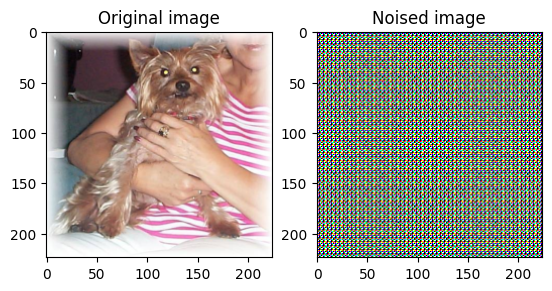

tensor([[0.4799, 0.5201]], device='cuda:1', grad_fn=<SoftmaxBackward0>)
tensor([[0.6082, 0.3918]], device='cuda:1', grad_fn=<SoftmaxBackward0>)


In [4]:
import random

img, target = random.choice(dataset)
classifier_predict = classifier(img.to(device).unsqueeze(0))
attacked_classifier_predict = attacked_classifier(img.to(device).unsqueeze(0), draw_mode=True)

def print_predict(predict, text):
    print(text + "dog" if predict > 0.5 else "cat") 
print(classifier_predict)
print(attacked_classifier_predict)
# print_predict(classifier_predict, "non-attacked classifier: ")
# print_predict(attacked_classifier_predict, "attacked classifier: ")

In [ ]:
num_params = sum(p.numel() for p in attacker.parameters())
print(f"Number of parameters in the model: {num_params}, with weight of {'{:.2f}'.format(num_params*4/1024/1024)} MB")

Number of parameters in the model: 1800, with weight of 0.01 MB


In [46]:
(0.007*sample.grad.sign()).sum()

tensor(1.7360, device='cuda:1')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


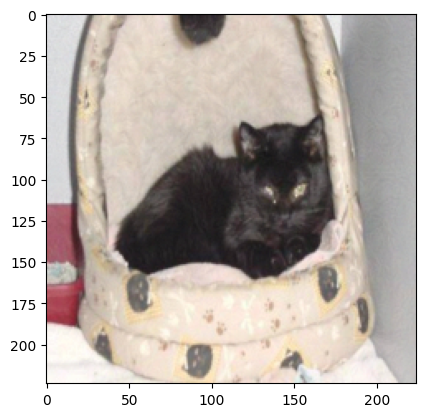

In [44]:
dataset.show_tensor_image((sample+0.007*sample.grad.sign()).detach().cpu().squeeze(0))

In [2]:
import torch
import torch.nn as nn

In [2]:
import torch

# Your mapped vector
mapped_vector = torch.rand(5)  # Replace with your actual mapped vector

# Round to -1 or 1
rounded_vector = torch.where(mapped_vector >= 0.5, torch.tensor(1.0), torch.tensor(-1.0))

# Print the original and rounded vectors
print("Mapped:", mapped_vector)
print("Rounded:", rounded_vector)

Mapped: tensor([0.6305, 0.2092, 0.9390, 0.6692, 0.0165])
Rounded: tensor([ 1., -1.,  1.,  1., -1.])


In [40]:
classifier(sample+0.007*sample.grad.sign())

tensor([[0.2460, 0.7540]], device='cuda:1', grad_fn=<SoftmaxBackward0>)

In [ ]:
output

In [28]:
sample.grad.sign()

tensor([[[[ 1., -1.,  1.,  ...,  1.,  1.,  1.],
          [-1., -1.,  1.,  ...,  1.,  1.,  1.],
          [-1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [ 1., -1.,  1.,  ...,  1., -1., -1.],
          [-1.,  1.,  1.,  ...,  1., -1., -1.]],

         [[ 1., -1., -1.,  ...,  1., -1.,  1.],
          [-1., -1., -1.,  ...,  1., -1., -1.],
          [-1.,  1., -1.,  ..., -1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1.,  ...,  1., -1., -1.],
          [ 1.,  1.,  1.,  ...,  1., -1., -1.],
          [-1.,  1.,  1.,  ...,  1.,  1., -1.]],

         [[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1., -1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [-1., -1., -1.,  ...,  1.,  1., -1.],
          [-1., -1., -1.,  ...,  1., -1., -1.],
          [-1.,  1.,  1.,  ...,  1.,  1., -1.]]]], device='cuda:1')

In [13]:
img.to(device).unsqueeze(0).grad

In [8]:
out = attacker(img.to(device).unsqueeze(0))
# noise = (out - img.cpu())

In [22]:
img.to(0).unsqueeze(0).sum()

tensor(68699.6172, device='cuda:0')

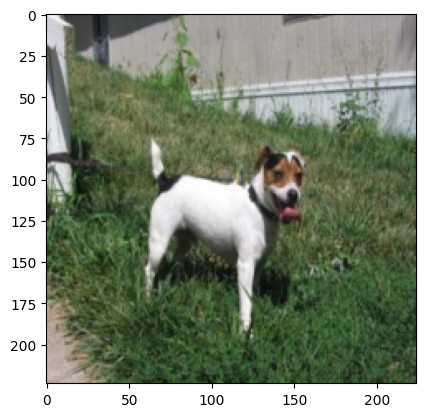

In [3]:
dataset.show_tensor_image(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


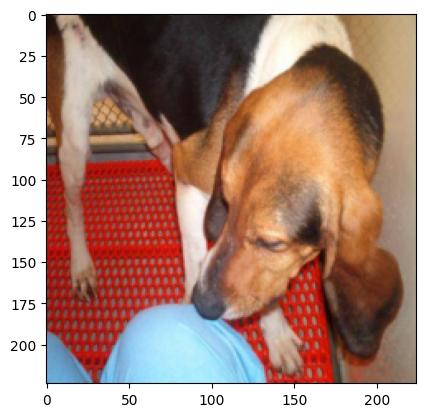

In [33]:
dataset.show_tensor_image(img + (out/out.sum()*50).cpu().detach())

In [42]:
normalized_noise = torch.zeros_like(out)
current_sum = out.sum(dim=(1, 2, 3))
for i in range(len(out)):
    normalized_noise[i] = out[i]/current_sum[i]*50

## Grad generator checking 

In [1]:
from Evaluater import Evaluater
from Classifier import ResNet18
from GradPredModel import *
from GradAttacked import *
from MakeDataset import MakeDataset
from torch.utils.data import DataLoader
import torch

device = 1

base_dir='/home/stud_valery/gan_adversarial/data'
dataset = MakeDataset(base_dir, 'training_set', limit=100)
dataloader = DataLoader(dataset, batch_size=30, shuffle=False)

attacker = GradPredModel().to(device)
# gen_params = torch.load('/home/stud_valery/gan_adversarial/train_record/teeest/best_model',\
#                      map_location='cuda:'+str(device))
# attacker.load_state_dict(gen_params)

classifier = ResNet18().to(device)
classifier.eval()
params = torch.load('/home/stud_valery/gan_adversarial/train_record/no_normalization/best_model',\
                     map_location='cuda:'+str(device))
classifier.load_state_dict(params)

attacked_classifier = GradAttacked(attacker, classifier, eps = 0.070).to(device)
attacked_classifier.eval()
evaluater = Evaluater(attacked_classifier, dataloader, device)
# evaluater.eval()

/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
get dataset from /home/stud_valery/gan_adversarial/data/training_set/cats/...: 100%|██████████| 100/100 [00:00<00:00, 217.75it/s]
get dataset from /home/stud_valery/gan_adversarial/data/training_set/dogs/...: 100%|██████████| 100/100 [00:00<00:00, 226.19it/s]
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/stud_valery/anaconda3/envs/torchenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be re

In [6]:
evaluater.eval()

Evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]


{'f1': 0.9595794677734375,
 'accuracy': 0.9595959782600403,
 'precision': 0.9610270261764526,
 'recall': 0.9598979949951172}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


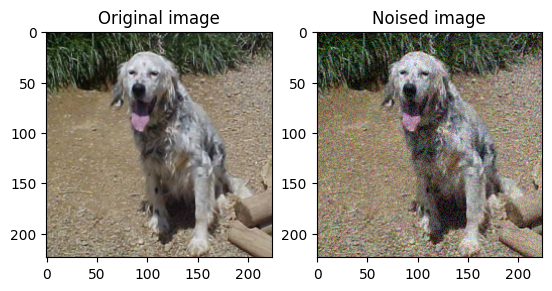

tensor([1], device='cuda:1')
tensor([1], device='cuda:1')


In [5]:
import random

img, target = random.choice(dataset)
classifier_predict = classifier(img.to(device).unsqueeze(0))
attacked_classifier_predict = attacked_classifier(img.to(device).unsqueeze(0), draw_mode=True)

def print_predict(predict, text):
    print(text + "dog" if predict > 0.5 else "cat") 
print(classifier_predict)
print(attacked_classifier_predict)
# print_predict(classifier_predict, "non-attacked classifier: ")
# print_predict(attacked_classifier_predict, "attacked classifier: ")

In [3]:
predicted_grad = attacker(img.to(device).unsqueeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


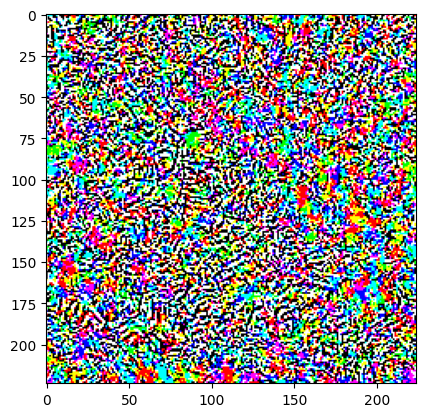

tensor([1], device='cuda:1')
tensor([0], device='cuda:1') tensor([1], device='cuda:1')


In [161]:
from torch.nn import functional as nnf
import random
import torch

classifier.train()

eps = 0.050

img, target = random.choice(dataset)
sample = img.to(device).unsqueeze(0)
target = torch.tensor(target).to(device).unsqueeze(0)
sample.requires_grad = True

output = classifier(sample)
classifier.zero_grad()

cost = nnf.cross_entropy(output, target).to(device)
cost.backward()

attack_sample = sample + eps*sample.grad.sign()
attack_sample = torch.clamp(attack_sample, 0, 1)

dataset.show_tensor_image(sample.grad.sign().cpu().detach().squeeze(0))

classifier.zero_grad()

# target_grad = sample.grad.sign()
sample = torch.clamp(sample, 0, 1)
# classifier.eval()
print(target)

classifier.eval()
print(classifier(attack_sample), classifier(sample))


In [13]:
torch.pow(target_grad, 2).sum()

tensor(10.0637, device='cuda:1')

In [14]:
torch.pow(target_grad-predicted_grad, 2).sum()

tensor(12.4413, device='cuda:1', grad_fn=<SumBackward0>)

In [9]:
(target_grad-predicted_grad).sum()

tensor(0.3585, device='cuda:1', grad_fn=<SumBackward0>)

In [21]:
comparison_tensor = (predicted_grad-target_grad == 0)
(comparison_tensor).view(-1).sum().item() / comparison_tensor.numel()

0.49939546130952384